<a href="https://colab.research.google.com/github/ledyquesada/Ejercicios/blob/main/ISemana5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploración y Manejo de Datos Faltantes

In [ ]:
#Identificar datos faltantes

import pandas as pd

# Cargar el conjunto de datos
df = pd.read_csv('tu_conjunto_de_datos.csv')

# Verificar datos faltantes
missing_data = df.isnull().sum()
print(missing_data)

#Mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()


# Eliminar filas con datos faltantes
df_cleaned_rows = df.dropna()

# Eliminar columnas con datos faltantes
df_cleaned_cols = df.dropna(axis=1)



#Imputacion simple(media, mediana, moda)
# Imputación usando la media
df['columna'] = df['columna'].fillna(df['columna'].mean())

# Imputación usando la mediana
df['columna'] = df['columna'].fillna(df['columna'].median())

# Imputación usando la moda
df['columna'] = df['columna'].fillna(df['columna'].mode()[0])

#Imputacion con scikit-learn
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Puedes ajustar la estrategia
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)



#Creacion de indicadores de datos faltantes
# Crear columna indicadora de datos faltantes
df['columna_indicador'] = df['columna'].isnull().astype(int)

#Imputacion multivariante
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer_multivariate = IterativeImputer(max_iter=10, random_state=0)
df_imputed_multivariate = pd.DataFrame(imputer_multivariate.fit_transform(df), columns=df.columns)


**Normalizacion y estandarización**

In [1]:
#Normalizar y estandarizar con sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

# Crear un conjunto de datos de ejemplo
data = {'Feature1': [2, 5, 8, 11, 14],
        'Feature2': [1, 4, 7, 10, 13]}
df = pd.DataFrame(data)

# Normalización (Min-Max)
min_max_scaler = MinMaxScaler()
df_normalized = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)

# Estandarización (Z-score)
standard_scaler = StandardScaler()
df_standardized = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)



**Transformacion de variables categoricas**

In [ ]:
#importamos
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Crear un conjunto de datos de ejemplo
data = {'Color': ['Rojo', 'Verde', 'Azul', 'Rojo', 'Azul'],
        'Tamaño': ['Pequeño', 'Mediano', 'Grande', 'Mediano', 'Pequeño'],
        'Precio': [10, 15, 20, 18, 12]}
df = pd.DataFrame(data)

# One-Hot Encoding
onehot_encoder = OneHotEncoder(sparse=False, drop='first')  # 'first' para evitar la colinealidad
onehot_encoded = onehot_encoder.fit_transform(df[['Color', 'Tamaño']])
df_onehot = pd.concat([df, pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names(['Color', 'Tamaño']))], axis=1)
df_onehot = df_onehot.drop(['Color', 'Tamaño'], axis=1)

# Codificación Ordinal
ordinal_encoder = OrdinalEncoder()
ordinal_encoded = ordinal_encoder.fit_transform(df[['Color', 'Tamaño']])
df_ordinal = pd.concat([df, pd.DataFrame(ordinal_encoded, columns=['Color_ordinal', 'Tamaño_ordinal'])], axis=1)
df_ordinal = df_ordinal.drop(['Color', 'Tamaño'], axis=1)



**Outliers**

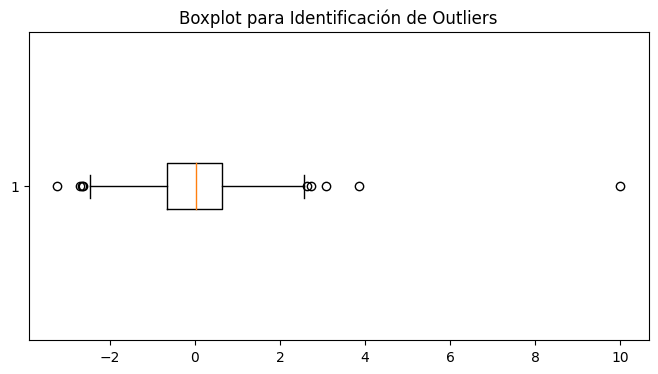

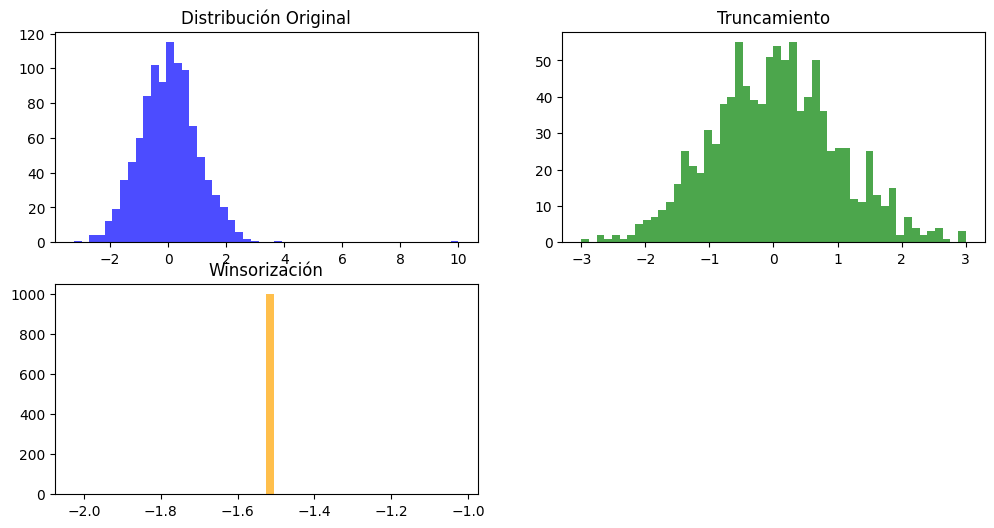

In [7]:
#importamos
import numpy as np
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt

# Crear un conjunto de datos de ejemplo con outliers
np.random.seed(42)  # para reproducibilidad
data = np.random.normal(size=1000)  # datos normalmente distribuidos
data[900] = 10  # introducir un outlier

# Identificación de Outliers
# Método 1: Visualización usando Boxplot
plt.figure(figsize=(8, 4))
plt.boxplot(data, vert=False)
plt.title('Boxplot para Identificación de Outliers')
plt.show()

# Método 2: Usando z-scores
z_scores = (data - np.mean(data)) / np.std(data)
outliers_z = np.abs(z_scores) > 3  # umbral de z-score para identificar outliers

# Truncamiento
lower_limit, upper_limit = -3, 3  # establecer límites
data_truncated = np.clip(data, lower_limit, upper_limit)

# Winsorización
lower_limit, upper_limit = 0.05, 0.95  # establecer límites en términos de fracciones
data_winsorized = winsorize(data, limits=(lower_limit, upper_limit))

# Comparar las distribuciones antes y después del tratamiento
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(data, bins=50, color='blue', alpha=0.7)
plt.title('Distribución Original')

plt.subplot(2, 2, 2)
plt.hist(data_truncated, bins=50, color='green', alpha=0.7)
plt.title('Truncamiento')

plt.subplot(2, 2, 3)
plt.hist(data_winsorized, bins=50, color='orange', alpha=0.7)
plt.title('Winsorización')

plt.show()


**Tecnicas de suavizado y agregacion**

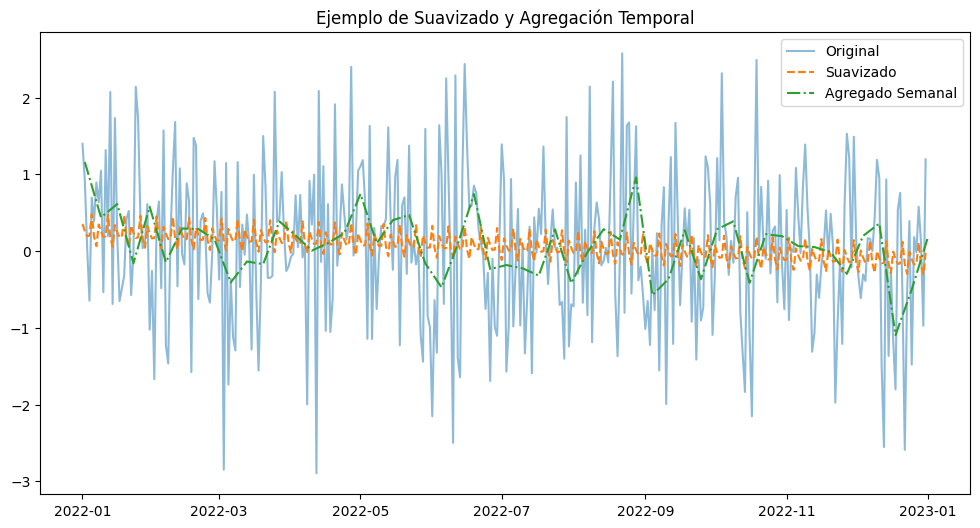

In [8]:
#importar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Crear un conjunto de datos de ejemplo con fechas
date_rng = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
data = np.random.randn(len(date_rng))  # datos aleatorios

# Crear DataFrame con fechas y datos
df = pd.DataFrame(data, columns=['Value'], index=date_rng)

# Suavizado exponencial
model = ExponentialSmoothing(df['Value'], trend='add', seasonal='add', seasonal_periods=7)
result = model.fit()
df['Smoothed'] = result.fittedvalues

# Agregación semanal
df_weekly = df.resample('W').mean()

# Visualización
plt.figure(figsize=(12, 6))
plt.plot(df['Value'], label='Original', alpha=0.5)
plt.plot(df['Smoothed'], label='Suavizado', linestyle='--')
plt.plot(df_weekly['Value'], label='Agregado Semanal', linestyle='-.')
plt.legend()
plt.title('Ejemplo de Suavizado y Agregación Temporal')
plt.show()


**Creacion de caracterisitcas**

In [9]:
#importar
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris de ejemplo
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

# Crear nueva característica: suma de Sepal Length y Sepal Width
X_train['sepal_sum'] = X_train['sepal length (cm)'] + X_train['sepal width (cm)']
X_test['sepal_sum'] = X_test['sepal length (cm)'] + X_test['sepal width (cm)']

# Entrenar un clasificador RandomForest con las nuevas características
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Realizar predicciones y evaluar el rendimiento
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Precisión del modelo con nuevas características: {accuracy:.2f}')


Precisión del modelo con nuevas características: 1.00
